In [1]:
# Importarea bibliotecilor necesare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Încărcarea dataset-ului local
data = pd.read_csv('gym_members_exercise_tracking.csv')

In [3]:
# Afișarea primelor câteva rânduri ale dataset-ului
print(data.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [4]:
# Verificarea valorilor lipsă
print(data.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [5]:
# Preprocesarea datelor
# Codificarea variabilelor categorice
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['Workout_Type'], drop_first=True)

In [6]:
# Împărțirea caracteristicilor și a variabilei țintă
X = data.drop(columns=['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'])  # Eliminarea coloanelor cu tipurile de antrenament pentru a evita capcana variabilelor fictive
y = data[['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']]  # Considerăm acestea ca fiind coloane binare


In [7]:
# Împărțirea în seturi de antrenament și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Ajustarea hiperparametrilor folosind GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [9]:
# Crearea unui clasificator de arbore de decizie
dt_classifier = DecisionTreeClassifier(random_state=42)


In [10]:
# Configurarea căutării în grilă
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)


In [11]:
# Antrenarea modelului
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [12]:
# Afișarea celor mai bune parametrii
print("Cei mai buni parametrii găsiți: ", grid_search.best_params_)


Cei mai buni parametrii găsiți:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [13]:
# Predicția
y_pred = grid_search.predict(X_test)


In [15]:
# Evaluarea modelului
print("Raportul de clasificare:")
# Transformăm predicțiile în etichete unice
y_pred_single = np.argmax(y_pred, axis=1)

# Transformăm etichetele de testare în format unic
y_test_single = np.argmax(y_test.values, axis=1)

print(classification_report(y_test_single, y_pred_single))
print("Matricea de confuzie:")
print(confusion_matrix(y_test_single, y_pred_single))
print("Scorul de acuratețe:", accuracy_score(y_test_single, y_pred_single))


Raportul de clasificare:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        88
           1       0.27      0.38      0.32        47
           2       0.39      0.23      0.29        60

    accuracy                           0.41       195
   macro avg       0.39      0.38      0.38       195
weighted avg       0.41      0.41      0.40       195

Matricea de confuzie:
[[47 31 10]
 [17 18 12]
 [28 18 14]]
Scorul de acuratețe: 0.40512820512820513


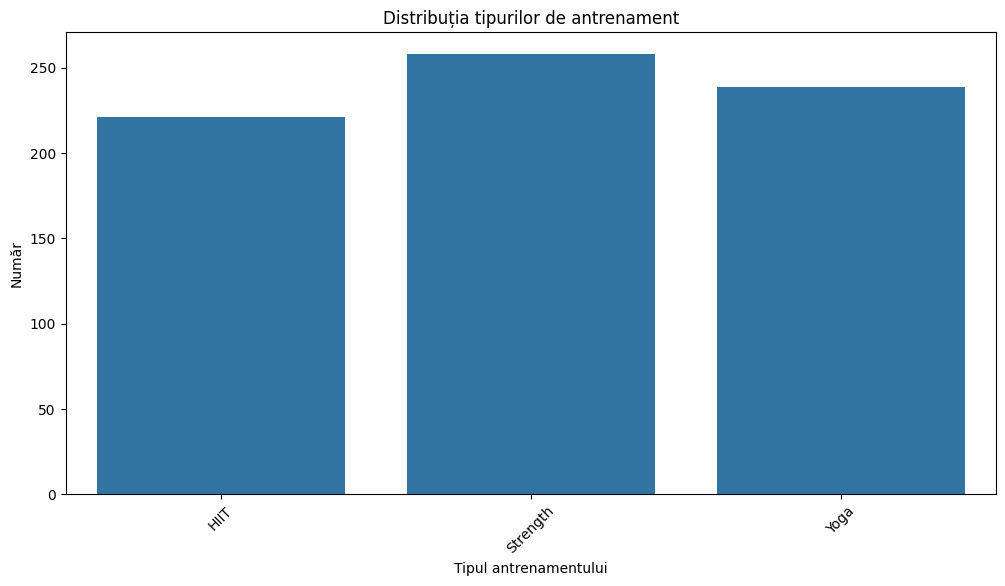

In [17]:
# EDA: Vizualizări
plt.figure(figsize=(12, 6))

# Crearea unei coloane pentru tipul de antrenament
workout_types = ['HIIT', 'Strength', 'Yoga']
workout_counts = [data['Workout_Type_HIIT'].sum(), 
                  data['Workout_Type_Strength'].sum(), 
                  data['Workout_Type_Yoga'].sum()]

sns.barplot(x=workout_types, y=workout_counts)
plt.title('Distribuția tipurilor de antrenament')
plt.xlabel('Tipul antrenamentului')
plt.ylabel('Număr')
plt.xticks(rotation=45)
plt.show()


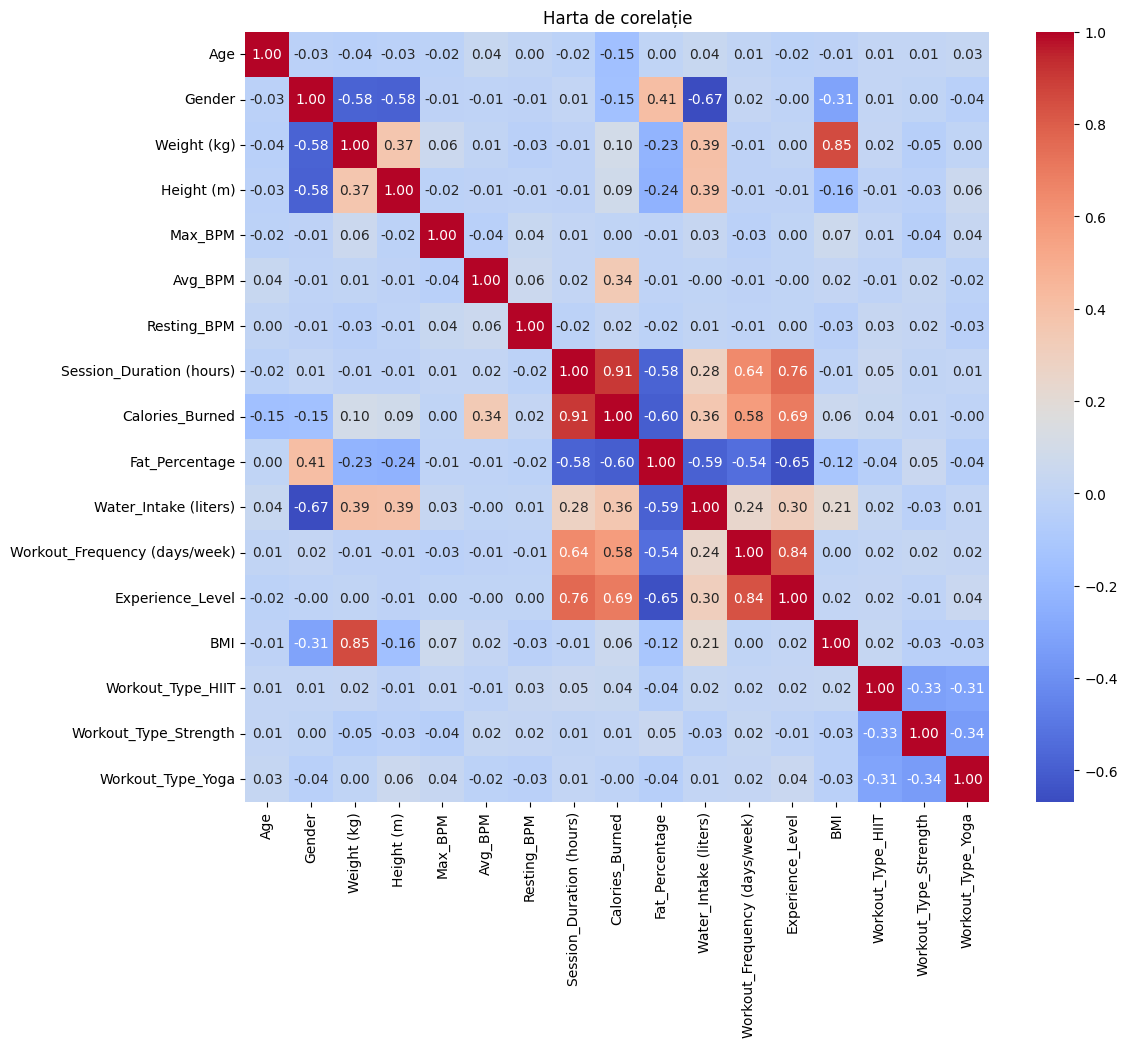

In [18]:
# Harta de corelație
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Harta de corelație')
plt.show()